## Models initialization

In [1]:
import torch
import torchvision.models as models

model_dict = {
      'AlexNet': models.alexnet(pretrained=True),
      'VGG': models.vgg19_bn(pretrained=True),
      'GoogleNet': models.googlenet(pretrained=True),
      'ResNet': models.resnet152(pretrained=True),
      'ResNeXt': models.resnext101_32x8d(pretrained=True)
}

## Images

In [6]:
import matplotlib.pyplot as plt
import math
from PIL import Image
import os

filter_name = '256'
photos_dir = os.path.join('..', 'dataset', filter_name)
photos = {}

def display_images(images, columns=5, width=20, row_height=3.5, font_size=20, title=""):
    rows = math.ceil(len(images) / columns)
    fig = plt.figure(figsize=(width, row_height * rows))
    fig.suptitle(title, fontsize=font_size, x=0.14)

    for i, img in enumerate(images):
        plt.subplot(len(images) // columns + 1, columns, i + 1)
        plt.imshow(images[img])
        plt.title(label=img)
        plt.axis("off")

def get_all_images():
    global photos_dir, photos
    all_photos = os.listdir(photos_dir)
    for x in all_photos:
        x_path_original = os.path.join(photos_dir, x)
        photos[x[:-4]] = Image.open(x_path_original)

get_all_images()
photos

{'bee0': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=256x256 at 0x1E6FFFE85E0>,
 'broccoli0': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=256x256 at 0x1E6FFFE85B0>,
 'broccoli1': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=256x256 at 0x1E6FFFE8850>,
 'cab1': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=256x256 at 0x1E68B258310>,
 'candle1': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=256x256 at 0x1E68B258400>,
 'candle2': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=256x256 at 0x1E68B258520>,
 'candle5': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=256x256 at 0x1E68B2585B0>,
 'chain1': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=256x256 at 0x1E68B258610>,
 'chain2': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=256x256 at 0x1E68B258670>,
 'electric_guitar1': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=256x256 at 0x1E68B2586D0>,
 'electric_guitar2': <PIL.JpegImagePlugin.JpegImageFile

## Image transformations for models inputs

In [3]:
from torchvision import transforms

transform = transforms.Compose([
    transforms.CenterCrop(227),         # Crop the image to 227x227 pixels from center
    transforms.ToTensor(),              # Convert image to PyTorch Tensor data type
    transforms.Normalize(               # Normalizing image
        mean=[0.485, 0.456, 0.406],     # Mean and std same as used on training data
        std=[0.229, 0.224, 0.225]
    )
])

## Getting class names from file

In [4]:
with open('imagenet_classes.txt') as f:
    classes = [line.split(", ")[1].strip() for line in f.readlines()]

## Recognition and visualizing results

'DONE'

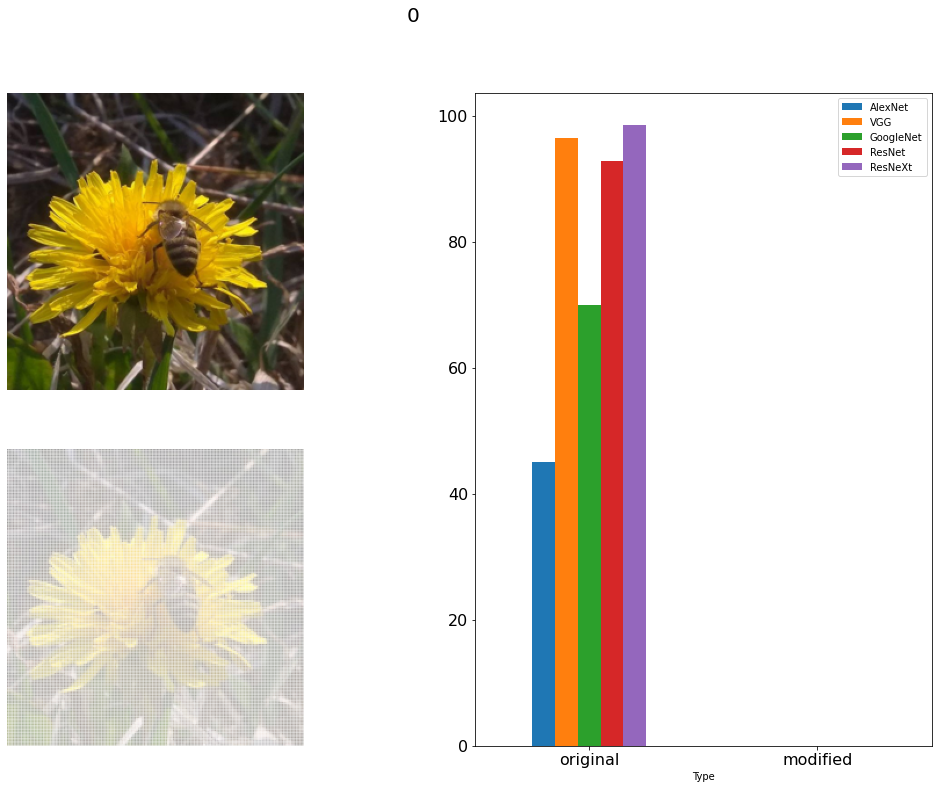

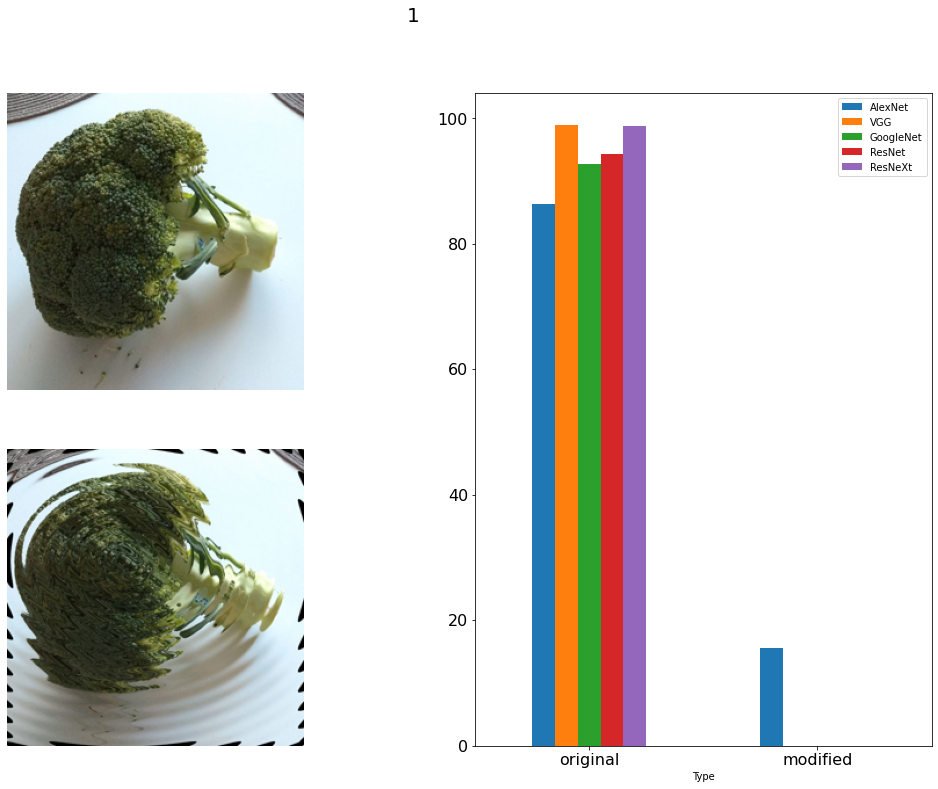

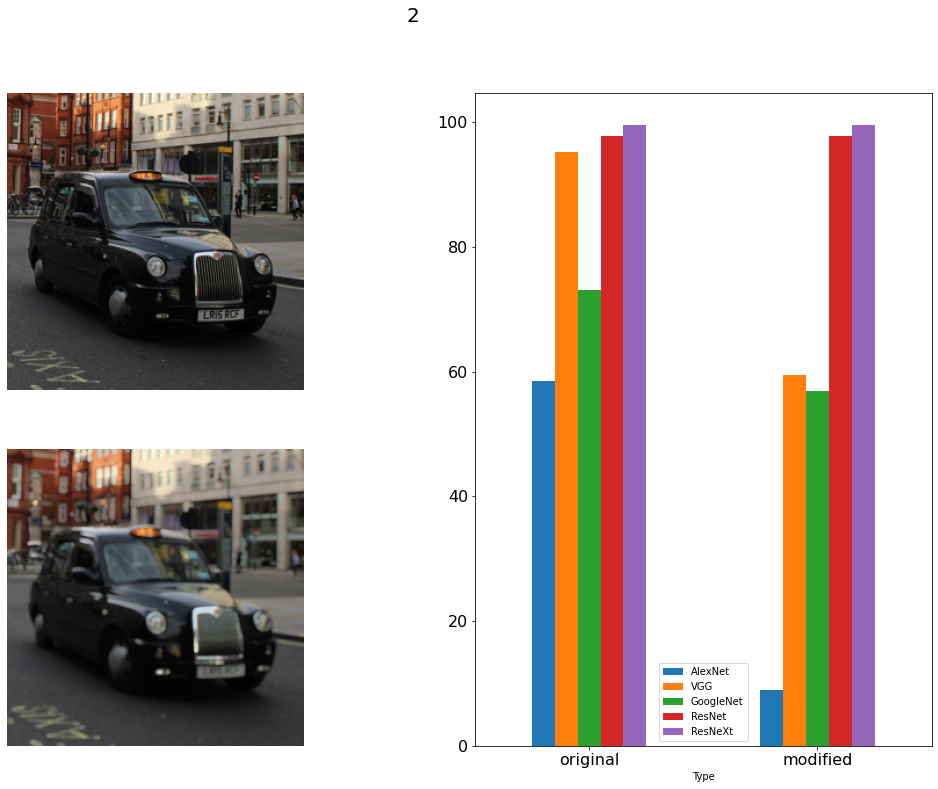

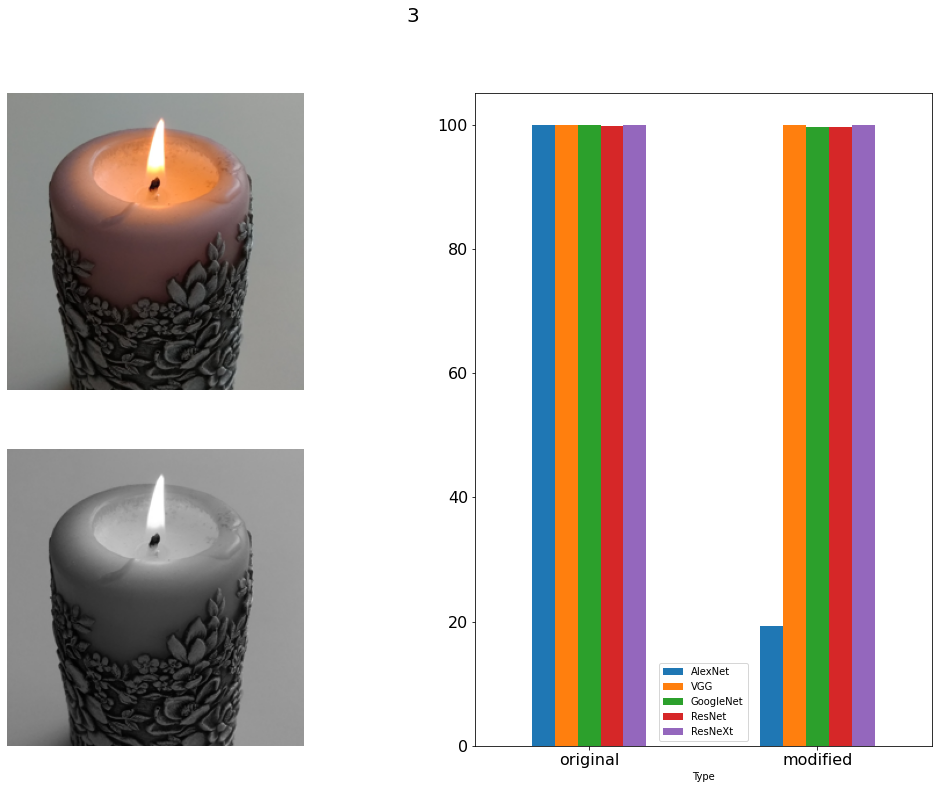

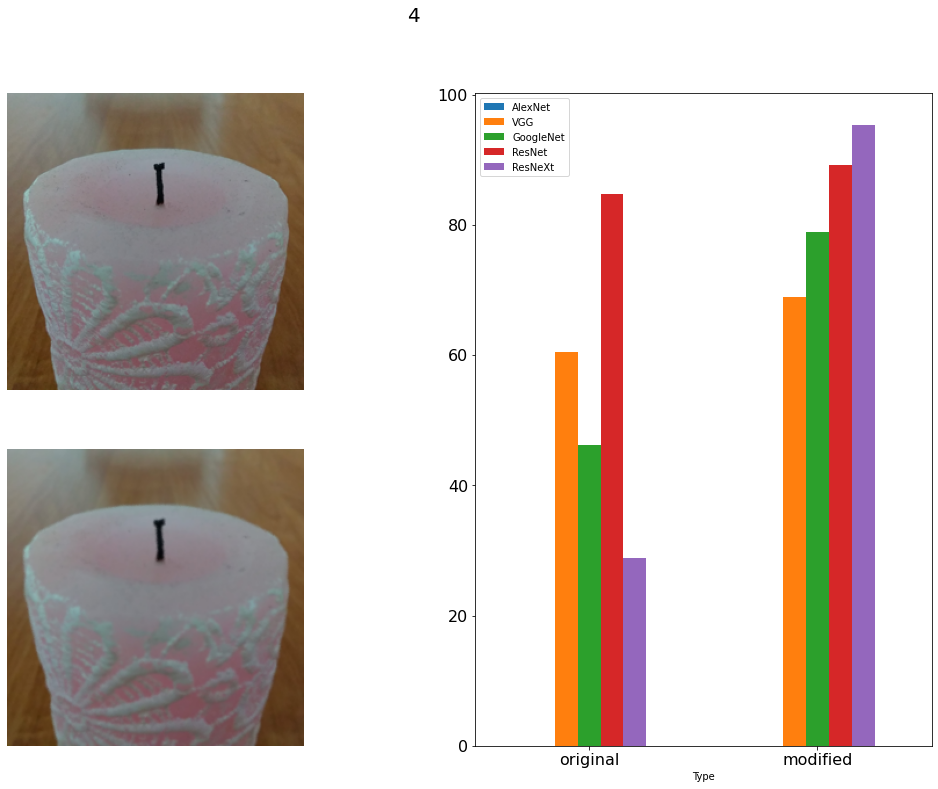

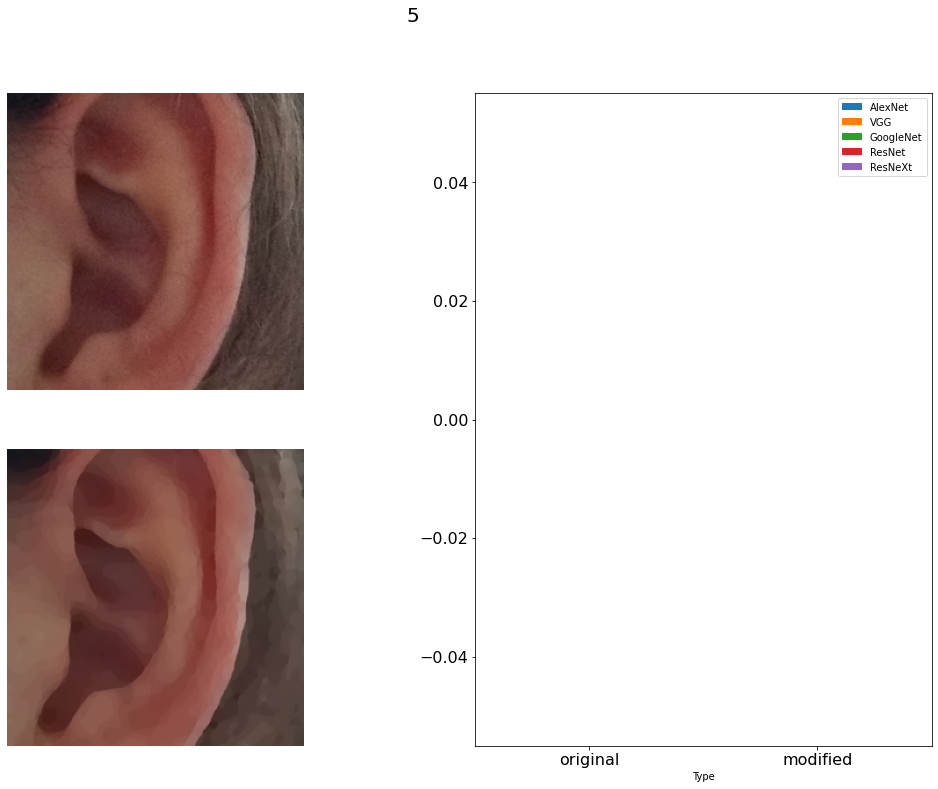

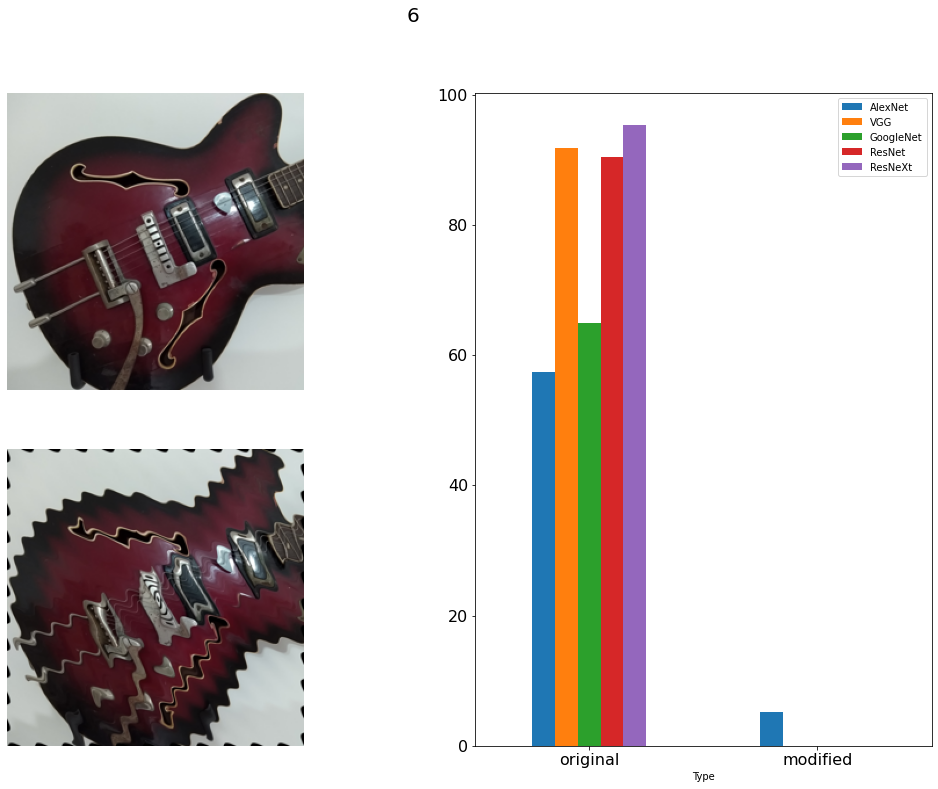

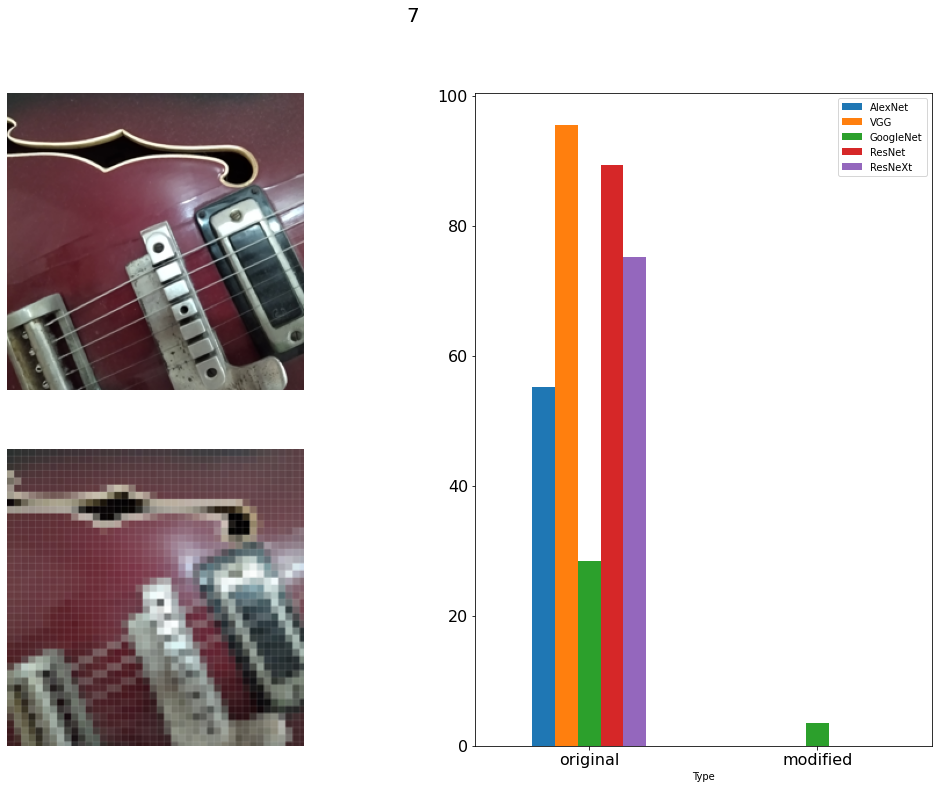

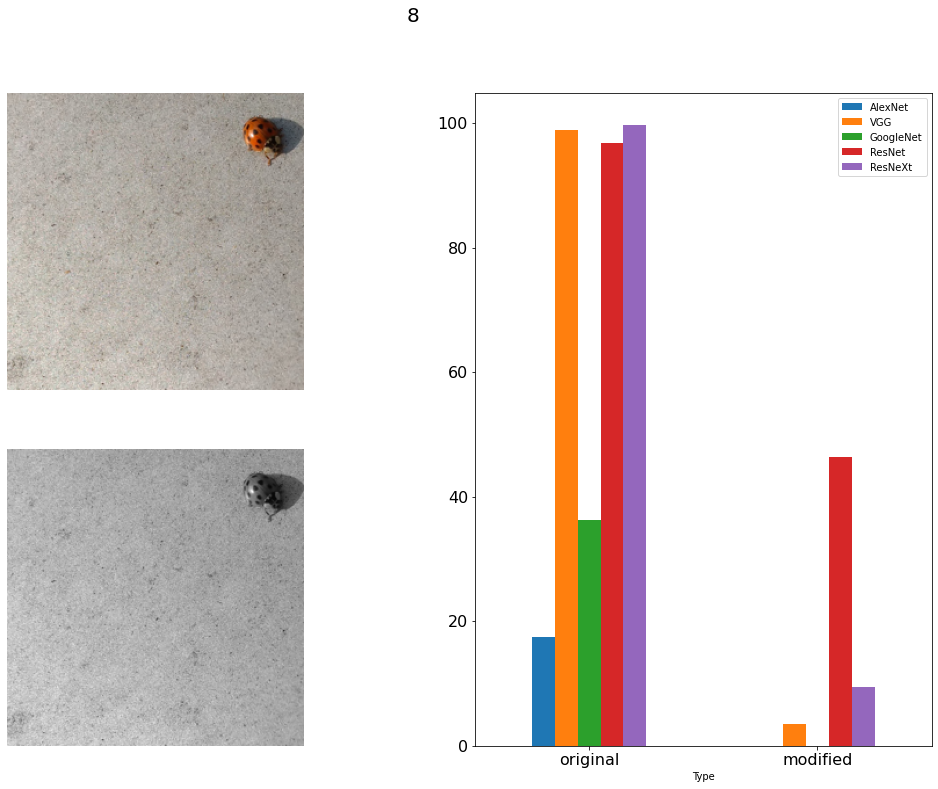

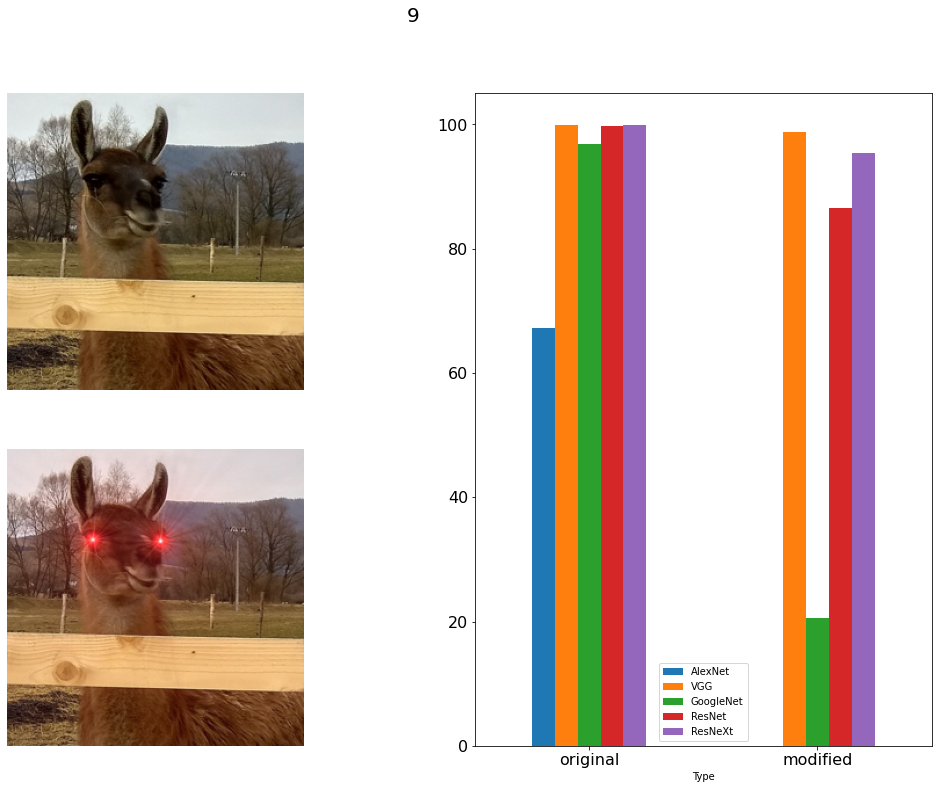

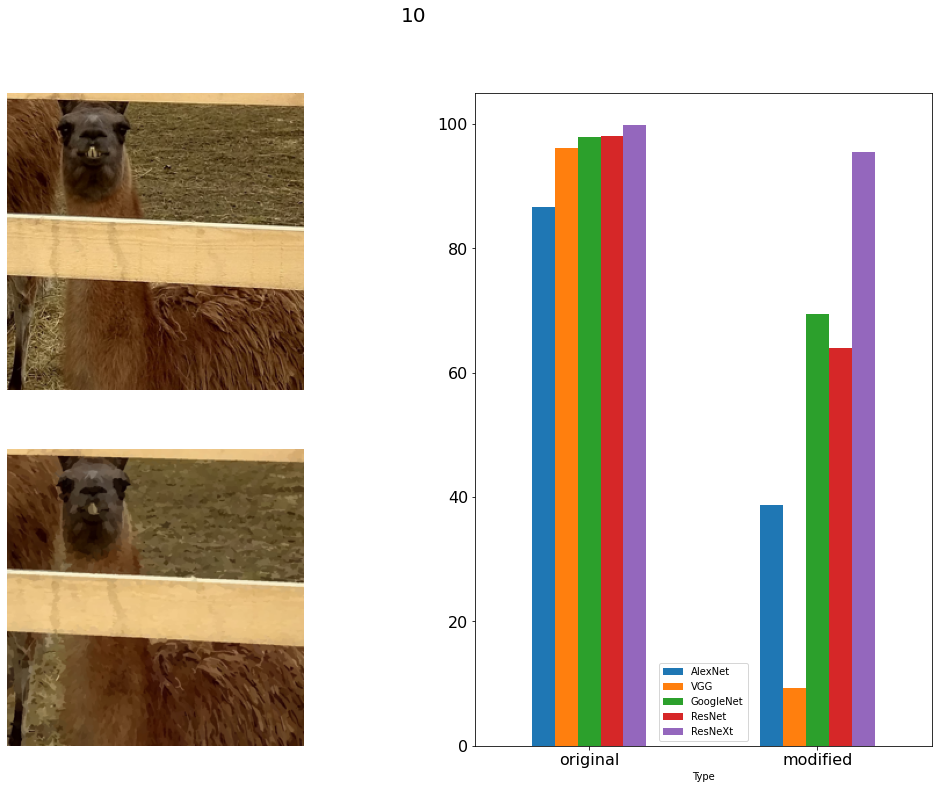

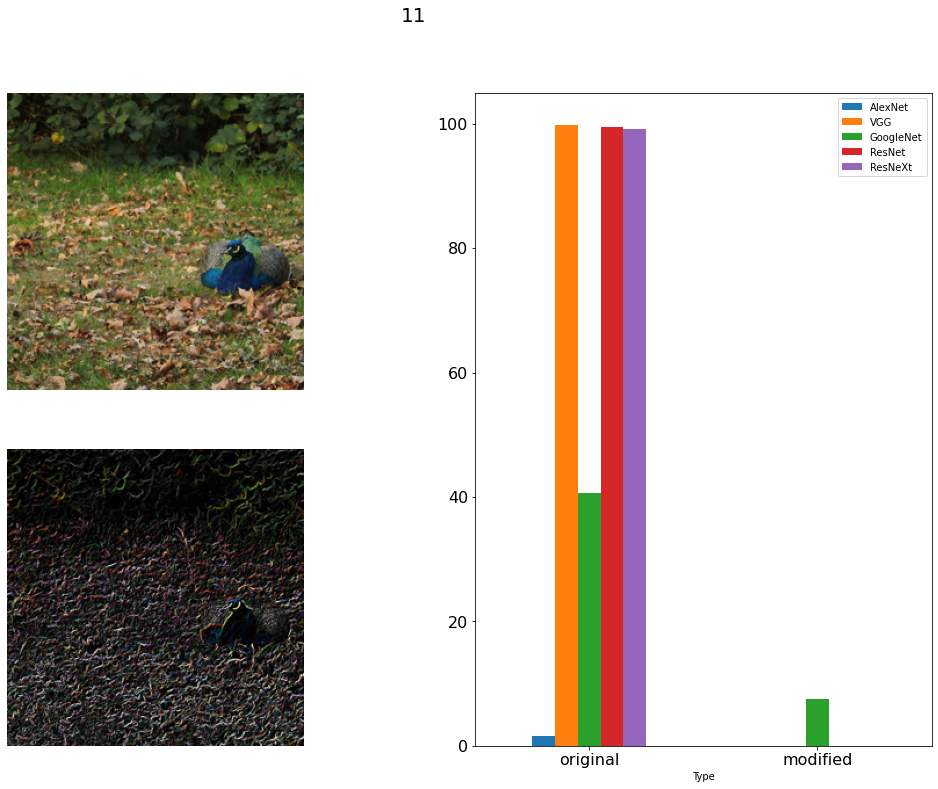

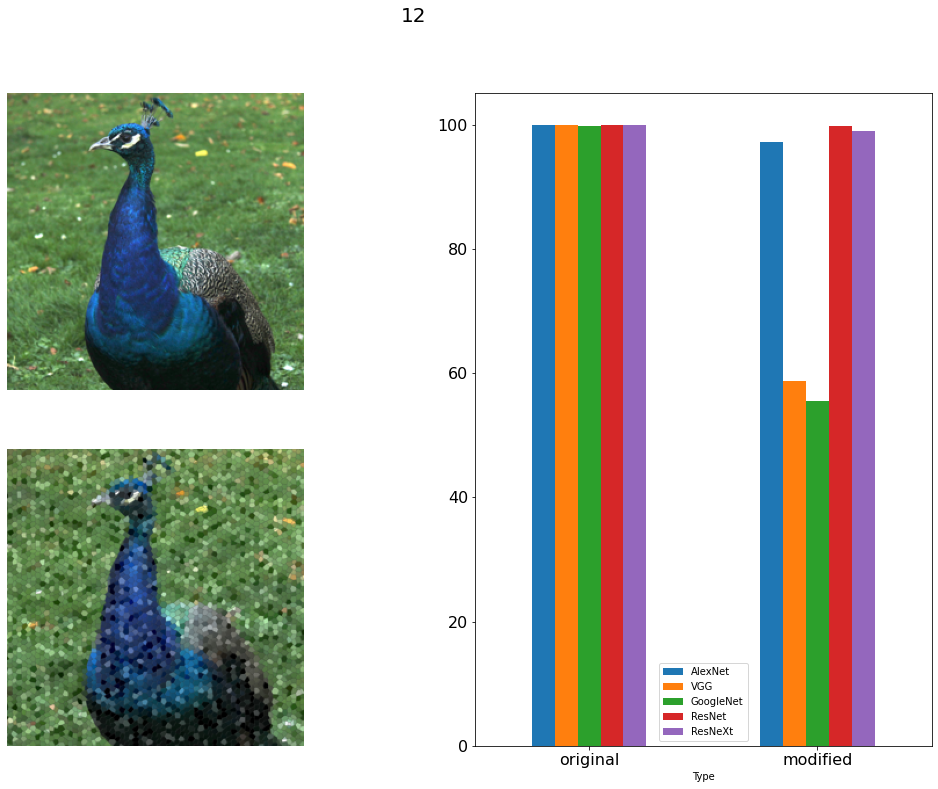

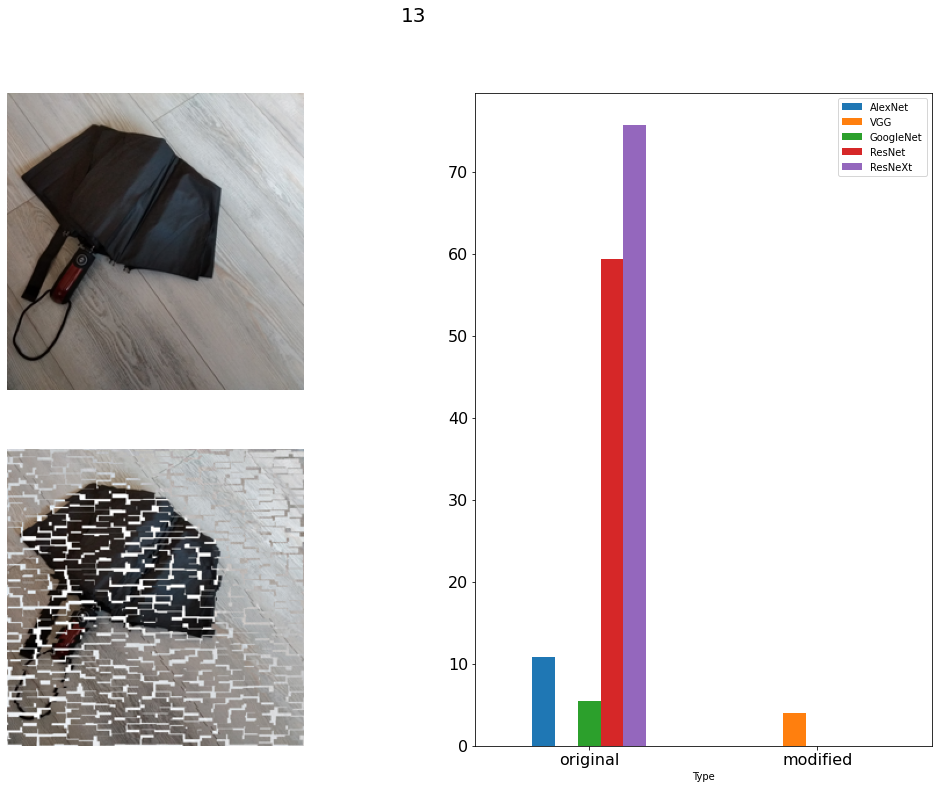

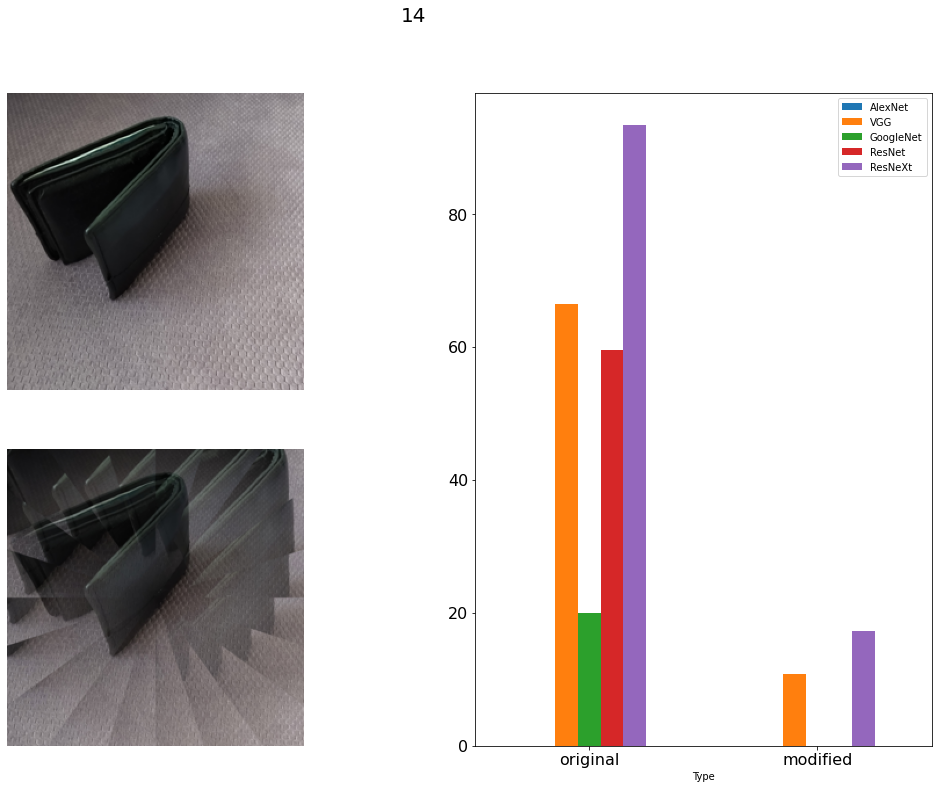

In [5]:
import csv
import pandas as pd

# TODO: Zmenit ukladanie na jeden subor a ukazovat len ktore uhadli a ktore nie

# Opening or creating csv file to store results
filename = os.path.join('..', 'csvs', '{}.csv'.format(filter_name))
result = open(filename, 'w')
filewriter = csv.writer(result, delimiter='\t', quotechar='"', quoting=csv.QUOTE_MINIMAL)
filewriter.writerow(['Image', 'AlexNet', 'VGG', 'GoogleNet', 'ResNet', 'ResNeXt'])

for img in photos:    
    # Recognition and writing to file
    row = []
    row.append(img)
    img_t = transform(photos[img])
    batch_t = torch.unsqueeze(img_t, 0)
    for model in model_dict:
        model_dict[model].eval()
        out = model_dict[model](batch_t)
        _, indices = torch.sort(out, descending=True)
        percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100
        found = 0
        for idx in indices[0][:5]:
            if classes[idx].lower().find(img[:-1].lower()) >= 0:
                found = percentage[idx].item()
                break
        row.append(found)
    try:
        filewriter.writerow(row)
    except:
        print(error)

result.close()

    # Display result

    fig = plt.figure(figsize=(18, 12))
    fig.suptitle(i-1, fontsize=20)

    original = plt.subplot2grid((2, 2), (0, 0))
    original.imshow(original_img)
    original.axis("off")

    modified_img_plt = plt.subplot2grid((2, 2), (1, 0))
    modified_img_plt.imshow(modified_img)
    modified_img_plt.axis("off")

    graph = plt.subplot2grid((2, 2), (0, 1), rowspan=2)
    df = pd.read_csv(filename)
    df.plot(x="Type", y=['AlexNet', 'VGG', 'GoogleNet', 'ResNet', 'ResNeXt'], kind="bar", rot=0, ax=graph, fontsize=16)
'DONE'
